In [1]:
import extras as ct
import pandas as pd

In [9]:
df = pd.read_csv('../test_data/EAST_WEST.csv')
df.head(1)

,holeid,from,to,DEPOSIT,XLSFILE,CU_NI,CU_NI_1,CU_S,CUpc,FEpc,LENGTH,NIpc,Spc,DEPOSIT_2,ROCKTYPE,UNIT,XLSFILE_2,INTERVAL
0,34873,0.0,22.0,BABBITT,WEST,NaN,NaN,NaN,NaN,NaN,2515.0,NaN,NaN,BABBITT,OVB,OVB,WEST,22.0


Boxplots by category, if parameter cats is not provided, then all available categories
are considered

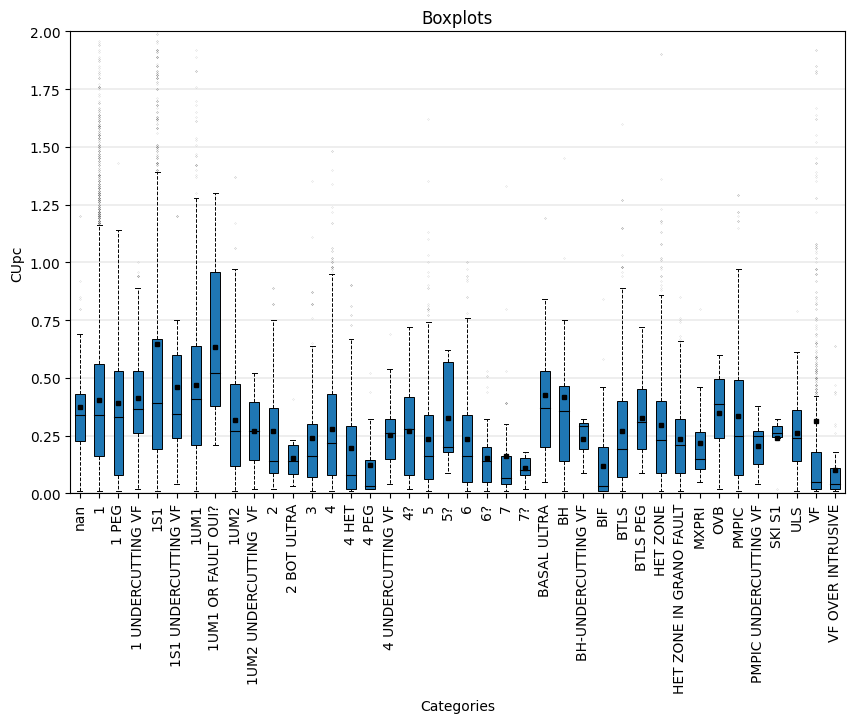

In [15]:
_ = ct.boxplot_by_category(
                        data = df,
                        var = 'CUpc',
                        catcol = 'UNIT',
                        #cats=[f'{i}' for i in range(1,9)]  + ['OVB'],
                        tmin=0,
                        markersize_mean=3,
                        markersize_flier=0.1,
                        widths=0.5,
                        ylim=(0,2),
                        figsize=(10,6),
                        stats=False,
                        use_all=False,
                        ylabel=vars
                        )

Grouped boxplots to check a continuous variable and grouped by category can be used in some cases including:  

    - Compare multiple block models   
    - Sensitivity Analysis to compare block models with different estimation   
    - Compare multiple composited files  

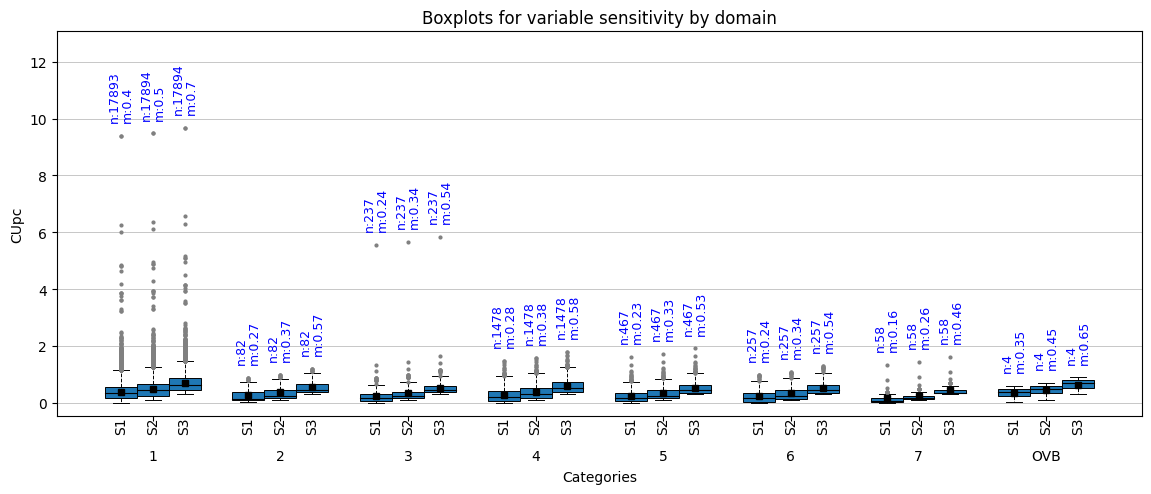

In [21]:
df2 = df.loc[df['UNIT'].isin([f'{i}' for i in range(1,9)]  + ['OVB'])].copy()

#sensitivity / different source variable
df3 = df2.copy()
df3['CUpc'] = df3['CUpc'] +0.1

df4 = df2.copy()
df4['CUpc'] = df3['CUpc'] +0.2

dfs = [df2,df3,df4]
ct.boxplot_by_category_sensitivity(dfs,'CUpc','UNIT',figsize=(14,5))